In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [28]:
## SET SNS DEFAULTS
from matplotlib import rcParams
rcParams['figure.figsize']= 11.7, 8.27
sns.set_style('white', rc = {"lines.linewidth":50})
sns.set_theme(context = 'paper', style = 'white', palette = 'seismic', font = 'Liberation Serif', font_scale = 3)

In [29]:
name = 'mnist'
FOLDER = f'./{name}'
# cifar


from pathlib import Path
Path(FOLDER).mkdir(parents = True, exist_ok = True)
# CIFAR-10
df = pd.read_csv('mnist.csv')

# Exclude a particular defense
df = df.drop(df[df['def_name'] == 'Class Labels'].index)

# Exclude cases with few samples
df = df[df.attack_size.astype('int') >= 100]

# Change column name
try:
    df['atk_name'] = df.attack_name
    df.drop(['attack_name'], axis = 1, inplace = True)
    df.fillna(method = 'ffill', inplace = True)
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)
except:
    print('Columns already named correctly')


# Enable for Cifar-10
# Specify the control


df.def_name.replace('Confident-prob:0.5', 'ArgMax', inplace = True)
new_defenses = []
for defense in df.def_name:
    defense = defense.replace('alpha', '$\\alpha$')
    defense = defense.replace('beta', '$\\beta$')
    defense = defense.replace('gamma', '$\gamma$')
    defense = defense.replace('sigma', '$\sigma$')


In [30]:
for column in df.columns:
    df[column].replace("Skip", np.nan, inplace = True)

In [31]:
# Parses attack/defense type from full name
defenses = df.def_name
new_names = []
for defense in defenses:
    new = str(defense).split("-")[0]
    new_names.append(new)
df['def_gen'] = new_names

attacks= df.atk_name 
new_names = []
for attack in attacks:
    new = str(attack).split("-")[0]
    new_names.append(new)
df['atk_gen'] = new_names

df['ben_pred_time'] = np.divide(df['ben_pred_time'].astype(float), 10000)
df['attack_time'] = np.divide(df['adv_pred_time'].astype(float), df['attack_size'].astype(float))

df['train_time'] = np.divide(df['train_time'], df['n'])
df['total_train_time'] = np.add(df['train_time'], df['ben_pred_time'])

print(set(df.atk_gen))
print(set(df.def_gen))

{'Pixel', 'Patch', 'Thresh', 'PGD', 'FGM', 'CW', 'Deep', 'HSJ'}
{'Sigmoid', 'Round', 'Control', 'Conf', 'Gauss', 'FSQ', 'TVM', 'SPS', 'Label'}


In [32]:
# Makes the data sns friendly
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['ben_acc', 'adv_acc'])

# Creates a red/blue color palette
binary_palette = sns.color_palette("seismic", 2)

# Plotting
## Benign and Adversarial Accuracy

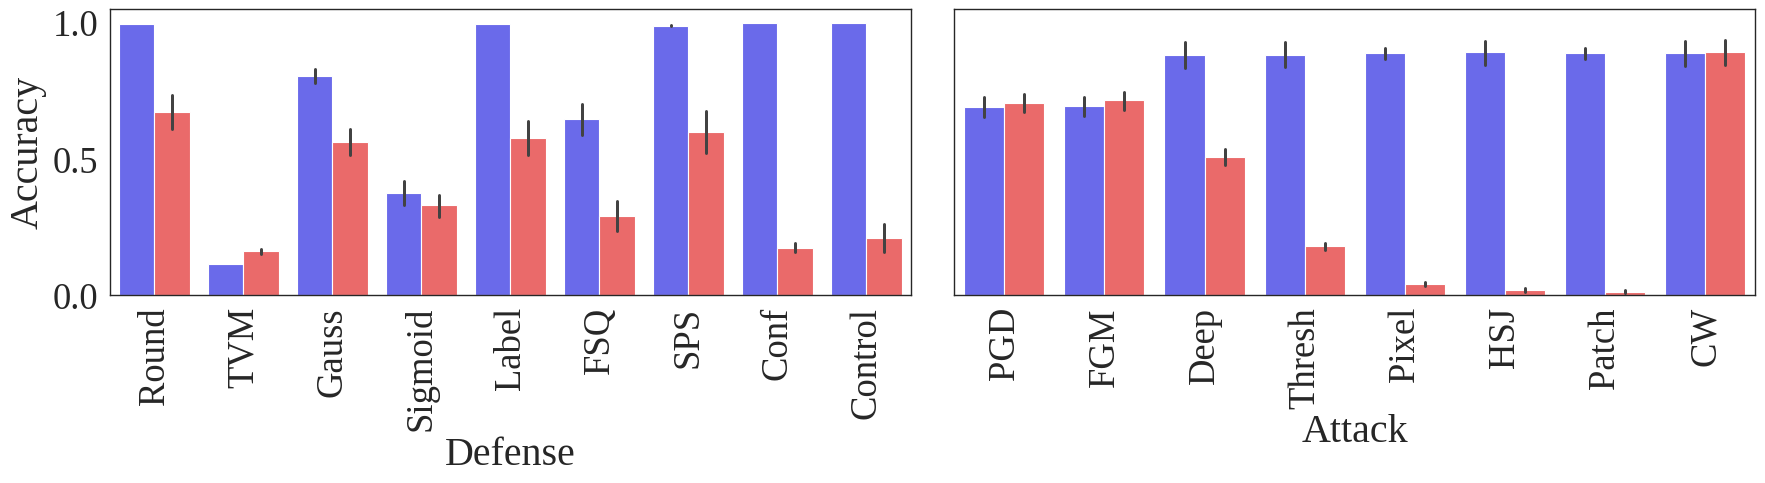

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Benign Accuracy'] = df.ben_acc
df['Adversarial Accuracy'] = df.adv_acc
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Accuracy', 'Adversarial Accuracy'])

fig, axs = plt.subplots(1, 2, sharey = True)

sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, errorbar=('ci', 95))
# axs[0].set_title("Defense Type vs Accuracy")
axs[0].set_xlabel("Defense")
axs[0].set_ylabel("Accuracy")
axs[0].legend_ = None
# axs[0].set_aspect(2.0)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)

sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, errorbar=('ci', 95))
# axs[1].set_title("Attack Type vs Accuracy")
axs[1].set_xlabel("Attack")
axs[1].set_ylabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
# axs[1].set_aspect(2.0)
axs[1].legend_ = None
# axs[1].legend(loc = [1.05, .4])

# save figure
fig.set_size_inches(18.5, 5.5)
plt.tight_layout()
plt.savefig(f"{FOLDER}/mnist_accuracy_plot.eps", format = "eps")





## Training and Prediction times in Benign/Adversarial circumstances

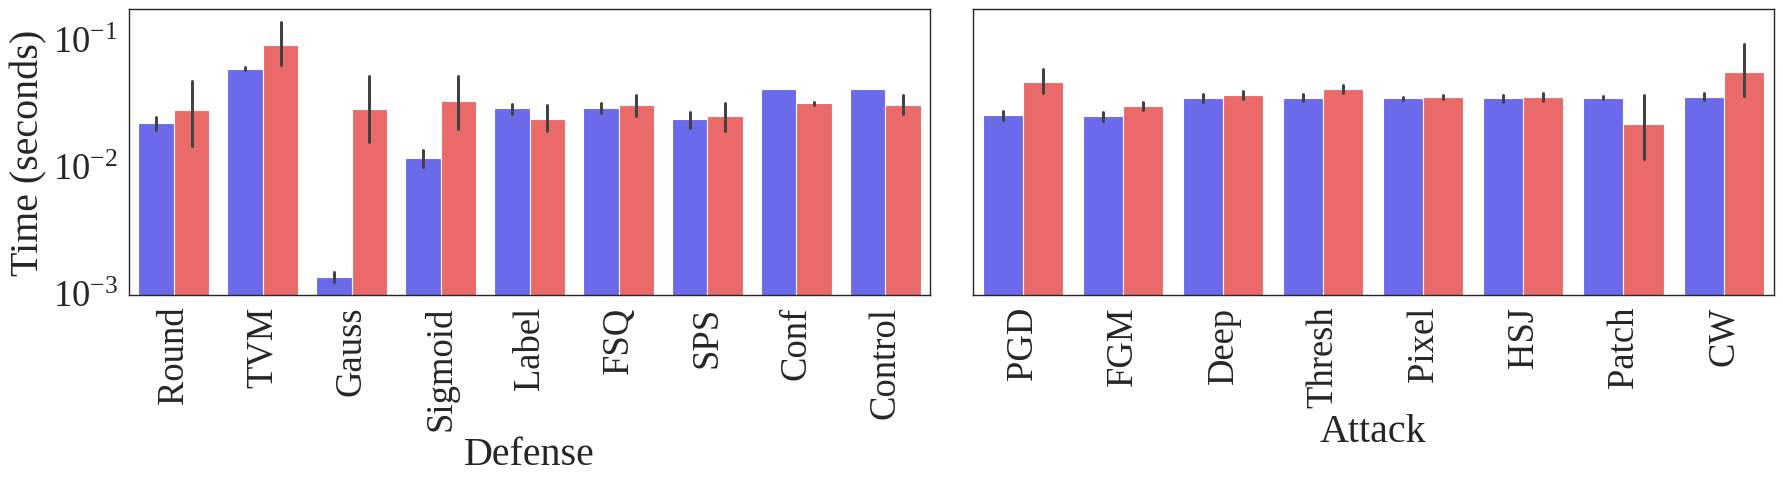

In [34]:
df['Benign Prediction Time'] = df.ben_pred_time
df['Attack Time'] = df.attack_time
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Prediction Time', 'Attack Time'])


# df['Benign Accuracy'] = df.ben_acc
# df['Adversarial Accuracy'] = df.adv_acc
# melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Accuracy', 'Adversarial Accuracy'])

fig, axs = plt.subplots(1, 2, sharey = True)
fig.figsize = (6, 40)

sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, errorbar=('ci', 95))
# axs[0].set_title("Defense Type vs Accuracy")
axs[0].set_xlabel("Defense")
axs[0].set_ylabel("Time (seconds)")
axs[0].legend_ = None
axs[0].set_yscale('log')
# axs[0].set_aspect(5)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)

sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, errorbar=('ci', 95))
# axs[1].set_title("Attack Type vs Accuracy")
axs[1].set_xlabel("Attack")
axs[1].set_ylabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
axs[1].set_yscale('log')
# axs[1].set_aspect(5)
axs[1].legend_ = None
# axs[1].legend(loc = [1.05, .4])

# save figure
fig.set_size_inches(18.5, 5.5)
plt.tight_layout()
plt.savefig(f"{FOLDER}/mnist_pred_time_plot.eps", format = "eps")


### Ben/Adv Failure Rates

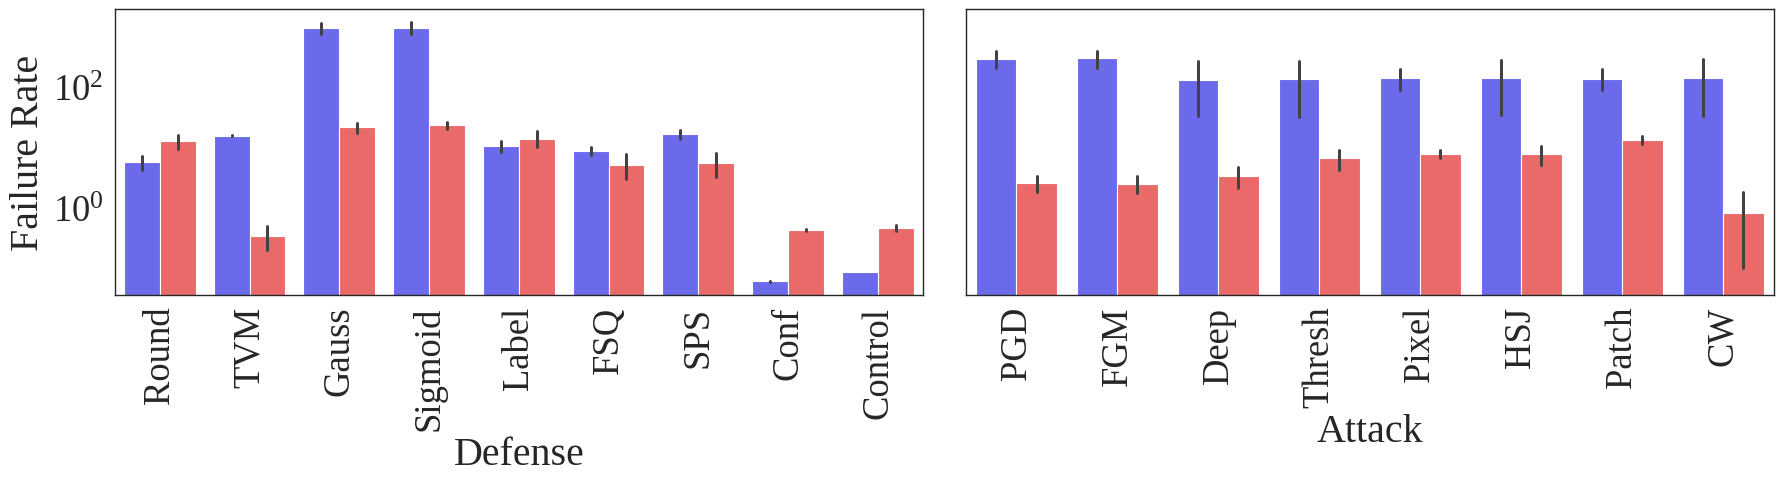

In [35]:
df['Benign Failure Rate'] = np.divide(1-df.ben_acc, df.ben_pred_time)
df['Adversarial Failure Rate'] = np.divide(1-df.adv_acc, df.adv_pred_time)
df['ben_failure_rate'] = df['Benign Failure Rate']
df['adv_failure_rate'] = df['Adversarial Failure Rate']
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Failure Rate', 'Adversarial Failure Rate'])



fig, axs = plt.subplots(1, 2, sharey = True)
fig.figsize = (6, 40)

sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, errorbar=('ci', 95))
# axs[0].set_title("Defense Type vs Accuracy")
axs[0].set_xlabel("Defense")
axs[0].set_ylabel("Failure Rate")
axs[0].legend_ = None
axs[0].set_yscale('log')
# axs[0].set_aspect(1.5)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)

sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, errorbar=('ci', 95))
# axs[1].set_title("Attack Type vs Accuracy")
axs[1].set_xlabel("Attack")
axs[1].set_ylabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
axs[1].set_yscale('log')
# axs[1].set_aspect(1.5)
axs[1].legend_ = None
# axs[1].legend(loc = [1.05, .4])

# save figure
fig.set_size_inches(18.5, 5.5)
plt.tight_layout()
plt.savefig(f"{FOLDER}/mnist_failure_rate_plot.eps", format = "eps")


### Training vs attack time

In [36]:
control = df[df.def_name == 'Control']
assert min(control.ben_failure_rate) == max(control.ben_failure_rate)
# assert min(control.adv_failure_rate) == max(control.adv_failure_rate)
control_rate = min(control.ben_failure_rate)
df[df.def_name == 'Control'].ben_failure_rate = control_rate
adv_control_rate = np.mean(control.adv_failure_rate)
control =  df[df.def_name == 'Control']
control_acc = max(control.ben_acc)
# control.ben_acc = control_acc

print(control_acc)
print(control_rate)
print(adv_control_rate)

0.9965
0.08675977263376432
0.47493717677911296


/tmp/ipykernel_361242/1631948269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.def_name == 'Control'].ben_failure_rate = control_rate


### Accuracy Grid

In [37]:
import numpy as np
from pandas import Series
attacks = list(set(df.atk_name))
defenses = list(set(df.def_name))


percent_change_array = []
failure_rate_array = []
relative_failure_rate_array = []


for i in range(len(attacks)):
    for j in range(len(defenses)):
        tmp = df[df['atk_name'] == attacks[i]]
        subset = tmp[tmp['def_name'] == defenses[j]]
        control = df[df.def_name == 'Control']
        percent_change = (np.mean(subset.adv_acc) - np.mean(control.adv_acc)) / np.mean(control.adv_acc) * 100
        percent_change_array.append(percent_change)
        
        failure_rate_array.append(np.mean(subset.adv_failure_rate))
        
        relative_failure_rate = (np.mean(control.adv_failure_rate) - np.mean(subset.adv_failure_rate)) / np.mean(control.adv_failure_rate)
        relative_failure_rate_array.append(relative_failure_rate)
        

percent_change_array = np.array(percent_change_array).reshape(len(attacks), len(defenses))
failure_rate_array = np.array(failure_rate_array).reshape(len(attacks), len(defenses))
relative_failure_rate_array = np.array(relative_failure_rate_array).reshape(len(attacks), len(defenses))
        
        

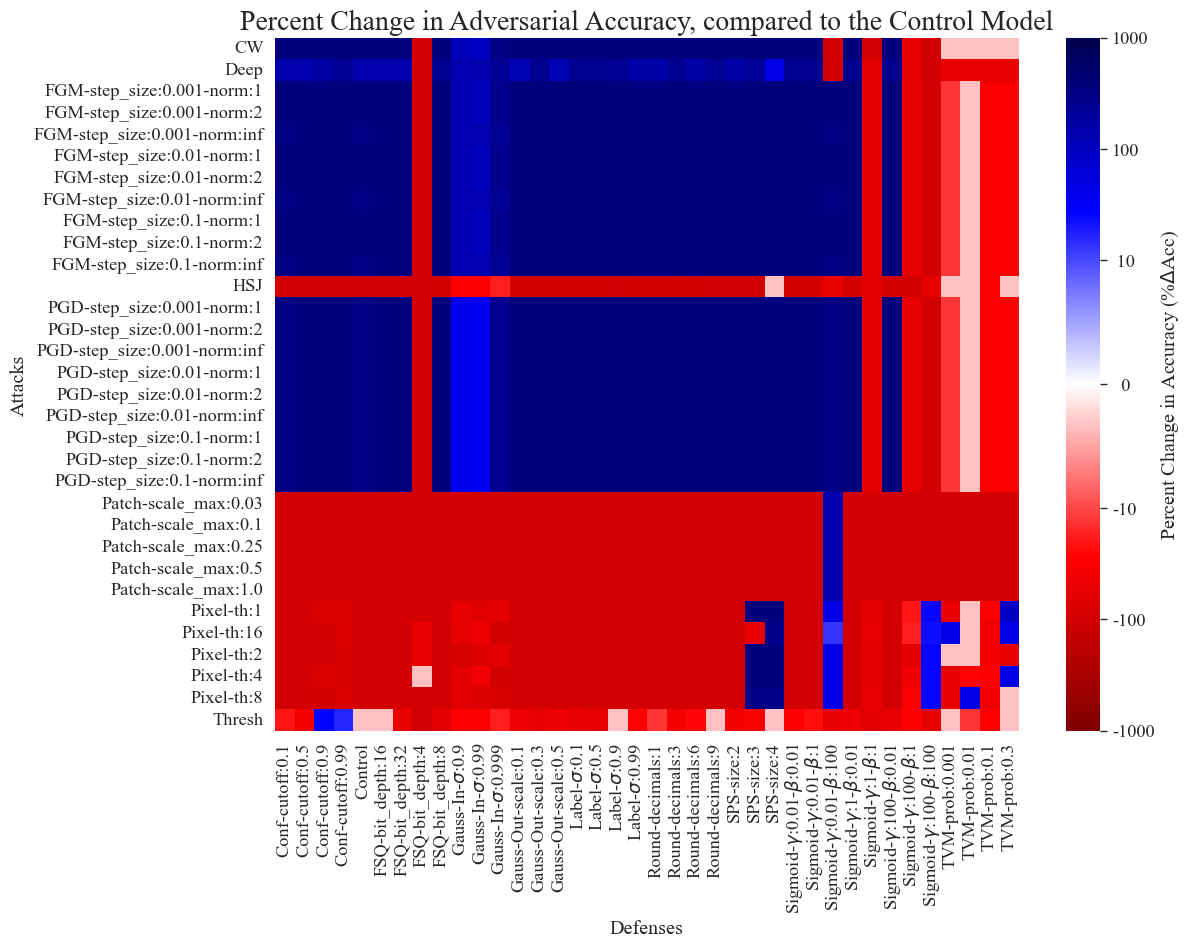

In [38]:
from matplotlib.colors import LogNorm, Normalize, SymLogNorm, CenteredNorm, TwoSlopeNorm, BoundaryNorm

def make_heatmap_from_grid(acc_array: np.ndarray, title: str, filename: str, norm, cbar_label, format='%.2f', cmap = 'seismic', y_axis = True):
    adv_acc_array = pd.DataFrame(acc_array)
    # adv_acc_array.fillna(method = 'ffill', inplace = True)
    sns.set(font_scale = 2)
    sns.set(rc={'figure.figsize':(12,9)})
    sns.set_style('white', rc = {"lines.linewidth":50})
    sns.set_theme(context = 'paper', style = 'white', palette = 'coolwarm', font = 'Times New Roman', font_scale = 1.5)
    assert len(adv_acc_array.columns) == len(defenses)
    assert len(adv_acc_array.index) == len(attacks)
    new_defenses = []
    for defense in defenses:
        defense = str(defense).replace("beta", "$\\beta$")
        defense = str(defense).replace("gamma", "$\gamma$")
        defense = str(defense).replace("alpha", "$\\alpha$")
        defense = str(defense).replace("sigma", "$\sigma$")
        new_defenses.append(defense)
    adv_acc_array.columns = new_defenses
    adv_acc_array.index = attacks
    adv_acc_array.sort_index(axis = 1, inplace = True)
    adv_acc_array.sort_index(axis = 0, inplace = True)
    adv_acc_array = adv_acc_array.reindex(sorted(adv_acc_array.columns), axis=1)
    output = sns.heatmap(adv_acc_array, cmap = cmap, norm = norm,  cbar_kws={'label': cbar_label, 'format': format, })
    output
    plt.ylabel("Attacks")
    plt.xlabel("Defenses")
    plt.title(title, size = 20);
    plt.savefig(filename,  bbox_inches='tight', format = "eps", dpi = 500)
    if y_axis == False:
        output.axes.yaxis.set_ticklabels([])
        plt.ylabel("")
    plt.show()
    return output
# plt.xticks(rotation = 70);

# title = "Accuracy on Benign (unperturbed) data relative to undefended model."
# filename = './archives/images/mnist/mnist_ben_grid.eps'
# benign_chart = make_heatmap_from_grid(ben_acc_array, title, filename, center = control_acc, format = "%.1f",  y_axis = False, cmap = "seismic_r")


title = "Percent Change in Adversarial Accuracy, compared to the Control Model"
filename = f'{name}/{name}_perecent_change_grid.eps'
bounds = np.logspace(-3, 3, 256)
norm = BoundaryNorm(boundaries=bounds, ncolors=256)
norm = CenteredNorm(vcenter=.001)
norm = SymLogNorm(linthresh=10, linscale=1, vmin=-1e3, vmax=1e3)
ticks = [-10e3, 10e3]
adversarial_chart = make_heatmap_from_grid(percent_change_array, title, filename,  cmap = 'seismic_r', format= '%3g', cbar_label= "Percent Change in Accuracy (%$\Delta$Acc)", norm = norm)


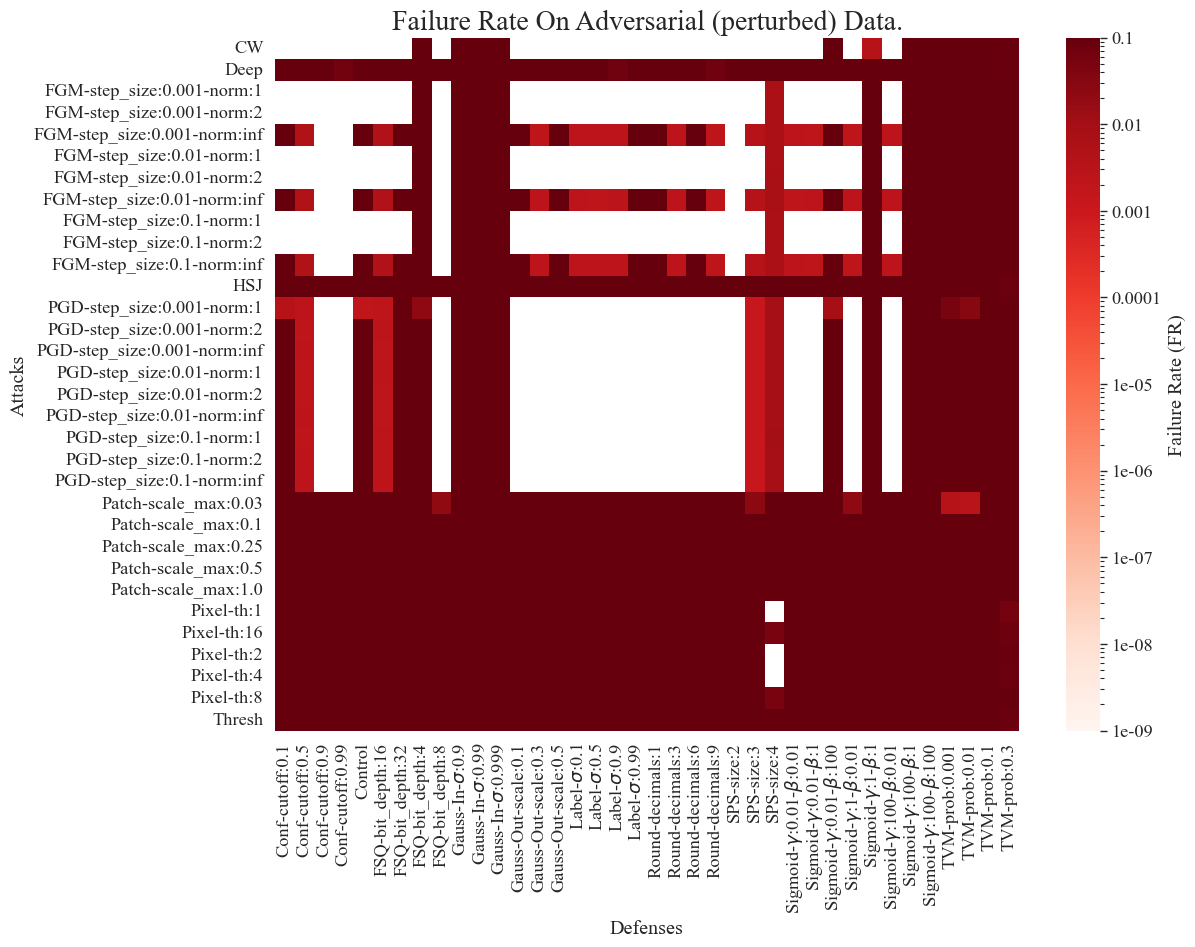

In [39]:
# title = "Failure Rate on benign examples relative to benign data failure rate."
# filename = './archives/images/mnist/mnist_ben_rate_grid.eps'
# benign_chart = make_heatmap_from_grid(ben_rate_grid, title, filename, center = control_rate, cbar_label =  'Failure Rate Relative to Control (mislabelled samples per second)', y_axis = False, norm = LogNorm())
title = "Failure Rate On Adversarial (perturbed) Data."
filename = f'{name}/{name}_adv_rate_grid.eps'
norm = LogNorm(vmax = 1e-1, vmin = 1e-9)
# norm = SymLogNorm(linthresh=10, linscale=1, vmin=-1e3, vmax=1e3)
label = "Failure Rate (FR)"
adversarial_chart = make_heatmap_from_grid(failure_rate_array, title, filename,  cmap = 'Reds', format= '%3g', cbar_label= label, norm =norm)


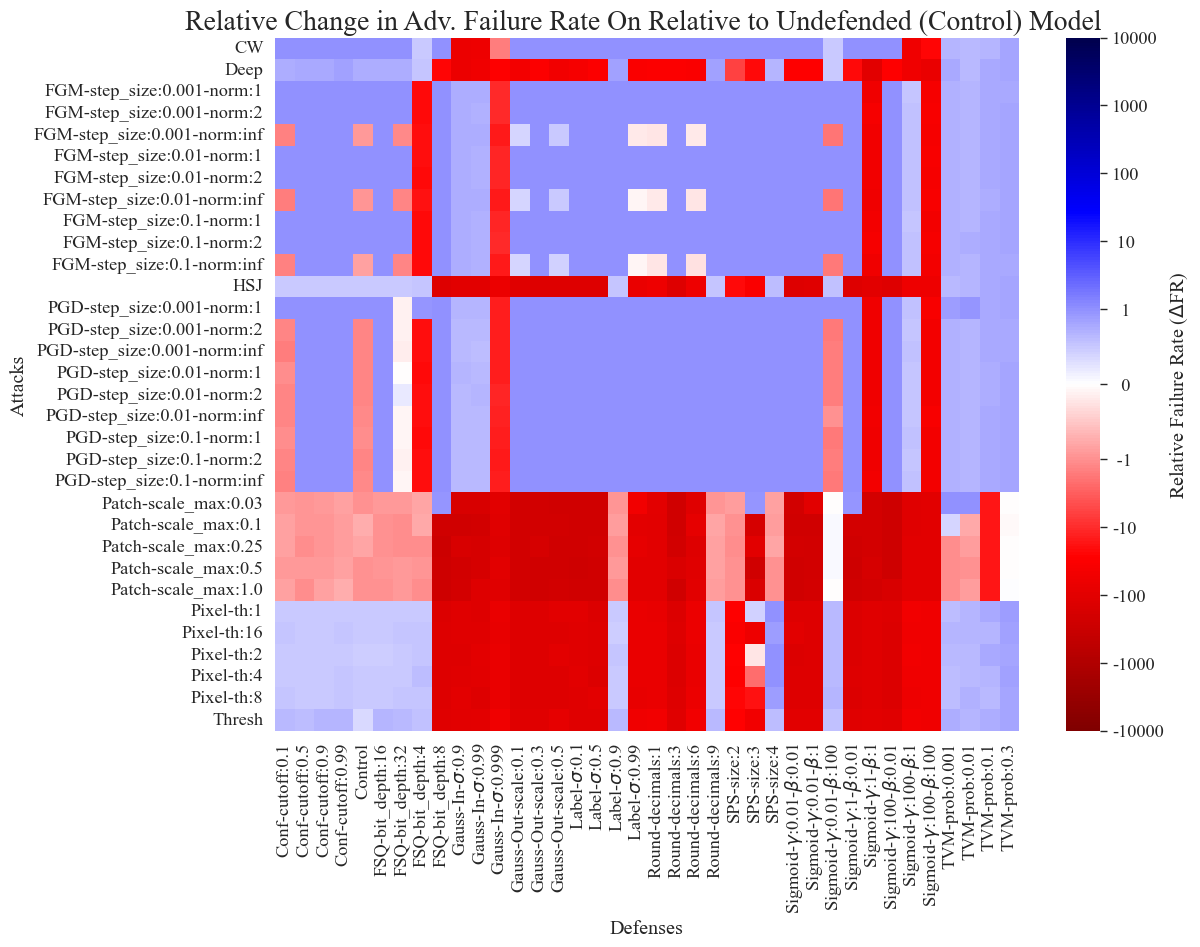

In [40]:
title = "Relative Change in Adv. Failure Rate On Relative to Undefended (Control) Model "
filename = f'{name}/{name}_gap_grid.eps'
norm = SymLogNorm(linthresh=1, linscale=1, vmin=-1e4, vmax=1e4)
rate_chart = make_heatmap_from_grid(relative_failure_rate_array, title, filename, norm = norm, cmap = 'seismic_r', cbar_label = "Relative Failure Rate ($\Delta$FR)", format= '%3g')